In [1]:
#importamos las librerias 
import pandas as pd  # Para manipulación de datos en formato DataFrame

import matplotlib.pyplot as plt # Para crear visualizaciones gráficas

import seaborn as sns  # Para mejorar las visualizaciones gráficas

In [3]:
# Cargamos el dataset desde un archivo CSV y lo almacenamos en un DataFrame
df = pd.read_csv("E-commerce.csv")

# Mostramos las primeras 5 filas del DataFrame para obtener una vista general de los datos
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [4]:
# contaremos la cantidad de registro
df.shape # para saber el tamaño del dataframe  (51290, 16) ese el tamaño de este

(51290, 16)

In [5]:
# contaremos los registros duplicados 
df.duplicated().sum() # duplicated() para saber y sum() para que sume los valores duplicado

# np.int64(0) este no contiene 

np.int64(0)

In [6]:
# identificaremos valores nulos
df.isna().sum().sum() # para ver isna() los valores nulos sum().sum() para contar la cantidad

# este contiene np.int64(8) solo 8 asi que procedere a eliminarlo ya que son pocos y no afecta a la calidad del analisis 

np.int64(8)

In [7]:
# procedemos a eliminar los valores nulos 
df = df.dropna() # utilisaremos dropna() para eliminar los valores nulos 

In [ ]:
# probaremos de nuevos a ver si se eliminaron correctamente
df.isna().sum().sum() # se eliminaron correctamente  

np.int64(0)

In [12]:
# visualisaremos las primeros 10 registro a ver si no hay incungruencia 
df.head(10) 

# no hay registro duplicado ni valores nulo y a lo que obcerve tampoco datos poco comun entonces empesare el analisis

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
5,2018-07-09,21:57:05,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card
6,2018-05-16,13:10:30,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card
7,2018-06-23,18:29:09,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card
8,2018-07-29,11:55:02,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card
9,2018-05-16,19:41:10,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order


In [ ]:
# ¿Cuál ha sido el volumen total de ventas ?
total_sales = df["Sales"].sum() # sumamos los datos de la columna sales para obtener el total de ventas

total_sales # mostramos el resultado

np.float64(7812164.0)

In [19]:
# ¿Cuál es el ticket promedio por compra?
sales_mean = df["Sales"].mean() # ponemos mean() para obtener el promedio de ventas de esa columna 

sales_mean # mostramos el resultado

np.float64(152.33735033735033)

In [ ]:
# ¿Cuáles son los productos más vendidos?
producto = df.groupby("Product")["Quantity"].sum().reset_index() # agrupamos por producto y sumamos la cantidad 

producto = producto.sort_values(by="Quantity", ascending=False).head(15) # ordenamos por cantidad de manera decendente y tomamos los 15 productos mas vendidos

producto  # mostramos el resultado

,Product,Quantity
37,Titak watch,6254.0
16,Formal Shoes,6154.0
33,Sports Wear,6093.0
25,Running Shoes,6064.0
17,Fossil Watch,6050.0
29,Sneakers,6049.0
11,Casula Shoes,6035.0
27,Shirts,6012.0
34,Suits,5996.0
35,T - Shirts,5986.0


In [ ]:
# ¿Qué categorías generan más ingresos?
categoria = df.groupby("Product_Category")["Sales"].sum().reset_index() # agrupamos por categoria y sumamos las ventas 

categoria = categoria.sort_values(by="Sales", ascending=False) # ordenamos por ventas 

categoria # mostramos resultados 

,Product_Category,Sales
2,Fashion,4345914.0
3,Home & Furniture,1975831.0
0,Auto & Accessories,1095681.0
1,Electronic,394738.0


In [ ]:
# ¿Hay temporadas donde las ventas aumentan o disminuyen significativamente?
fecha = df.groupby("Order_Date")["Sales"].sum().reset_index() # agrupamos por fecha de orden para obtener las fechas con myor ventas 

fecha = fecha.sort_values(by="Sales", ascending=False).head(15) # ordenamos por ventas para obtener las fechas con mayor ventas y limitamos a 15

fecha = fecha.sort_values(by="Order_Date", ascending=True) # ordenamos nuevamente pero esta ves por fecha para poder visualizarla de manera efetiva

fecha

,Order_Date,Sales
111,2018-04-24,94531.0
207,2018-07-30,72191.0
177,2018-06-30,49882.0
112,2018-04-25,43157.0
133,2018-05-16,43036.0
302,2018-11-07,41837.0
297,2018-11-02,40918.0
311,2018-11-16,40255.0
301,2018-11-06,40246.0
131,2018-05-14,39390.0


In [28]:
# ¿Cuál es el perfil de los clientes que más compran?
clientes = df.groupby("Customer_Login_type")["Quantity"].sum().reset_index() # agrupamos con tipos de clientes 

clientes

,Customer_Login_type,Quantity
0,First SignUp,384.0
1,Guest,4953.0
2,Member,122930.0
3,New,90.0


In [31]:
# Genero que mas compran
genero = df.groupby("Gender")["Quantity"].sum().reset_index() # agrupamos por genero y sumamos la cantidad

genero = genero.sort_values(by="Quantity", ascending=False)

genero

,Gender,Quantity
1,Male,69303.0
0,Female,59054.0


In [ ]:
# Metodo de pago mas usado
pago = df.groupby("Payment_method")["Quantity"].sum().reset_index() # agrupamos por metodo de pagos y sumamos las cantidad

pago = pago.sort_values(by="Quantity", ascending=False) # ordenmos por cantidad 

pago # mostramos resultado



,Payment_method,Quantity
0,credit_card,95376.0
3,money_order,24172.0
2,e_wallet,7009.0
1,debit_card,1796.0
4,not_defined,4.0


In [36]:
# Tipos de dispositivos 
dispositivos = df.groupby("Device_Type")["Quantity"].sum().reset_index() # agrupamos por tipo de dispositovos 

dispositivos = dispositivos.sort_values(by="Quantity", ascending=False) # ordenamos por cantidad

dispositivos # mostramos 

,Device_Type,Quantity
1,Web,119811.0
0,Mobile,8546.0


C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\1180287734.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=producto, y="Product", x="Quantity", ax=axes[1, 0], palette="Blues_d")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\1180287734.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\1180287734.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=categoria, x="Product_Category", y="Sales", ax=axes[1, 1], palette="Set1")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\1180287734.py:21: UserWarning: set_ticklabels() should only be used with a fixed numbe

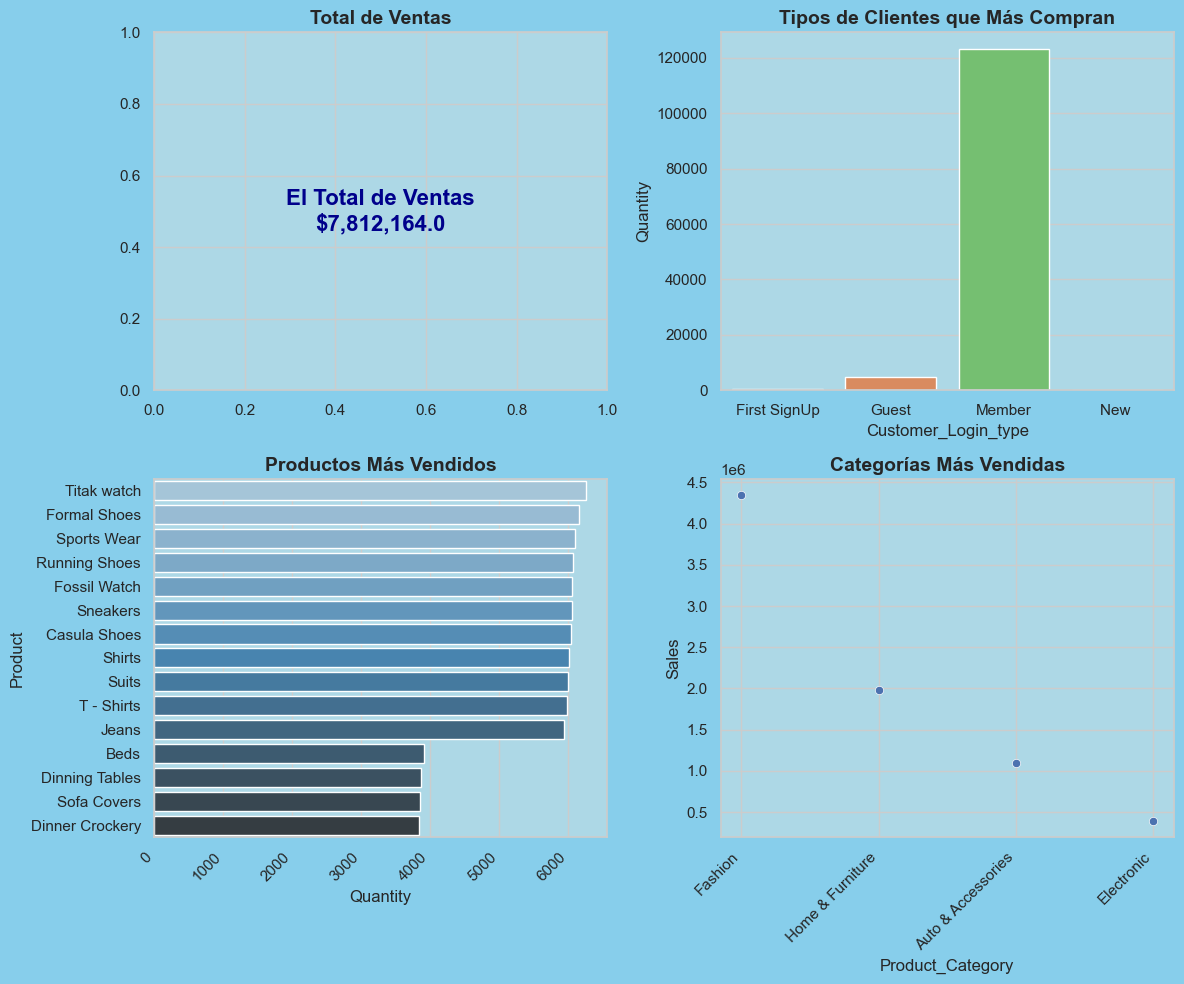

In [85]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Crear las subgráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='skyblue')

# Gráfico de texto para mostrar el total de ventas
axes[0, 0].text(0.5, 0.5, f"El Total de Ventas\n${total_sales:,}", 
                ha="center", va="center", fontsize=16, fontweight='bold', color="darkblue")
axes[0, 0].set_facecolor('lightblue')
axes[0, 0].set_title("Total de Ventas", fontsize=14, fontweight='bold')

# Gráfico de barras - Productos más vendidos
sns.barplot(data=producto, y="Product", x="Quantity", ax=axes[1, 0], palette="Blues_d")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")
axes[1, 0].set_title("Productos Más Vendidos", fontsize=14, fontweight='bold')
axes[1, 0].set_facecolor('lightblue')

# Gráfico de dispersión - Categorías más vendidas
sns.scatterplot(data=categoria, x="Product_Category", y="Sales", ax=axes[1, 1], palette="Set1")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right")
axes[1, 1].set_title("Categorías Más Vendidas", fontsize=14, fontweight='bold')
axes[1, 1].set_facecolor('lightblue')

# Gráfico de barras - Tipos de clientes que más compran
sns.barplot(data=clientes, x="Customer_Login_type", y="Quantity", ax=axes[0, 1], palette="muted")
axes[0, 1].set_title("Tipos de Clientes que Más Compran", fontsize=14, fontweight='bold')
axes[0, 1].set_facecolor('lightblue')

# Mejorar espaciado entre subgráficas
plt.tight_layout()

plt.savefig('grafico_ventas.pdf', format='pdf')
# Mostrar gráfico
plt.show()



C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\4090204472.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\4090204472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genero, x="Gender", y="Quantity", ax=axes[1, 0], palette="Set2")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\4090204472.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_1844\4090204472.py:20: FutureWarning: 

Passing `palette` wit

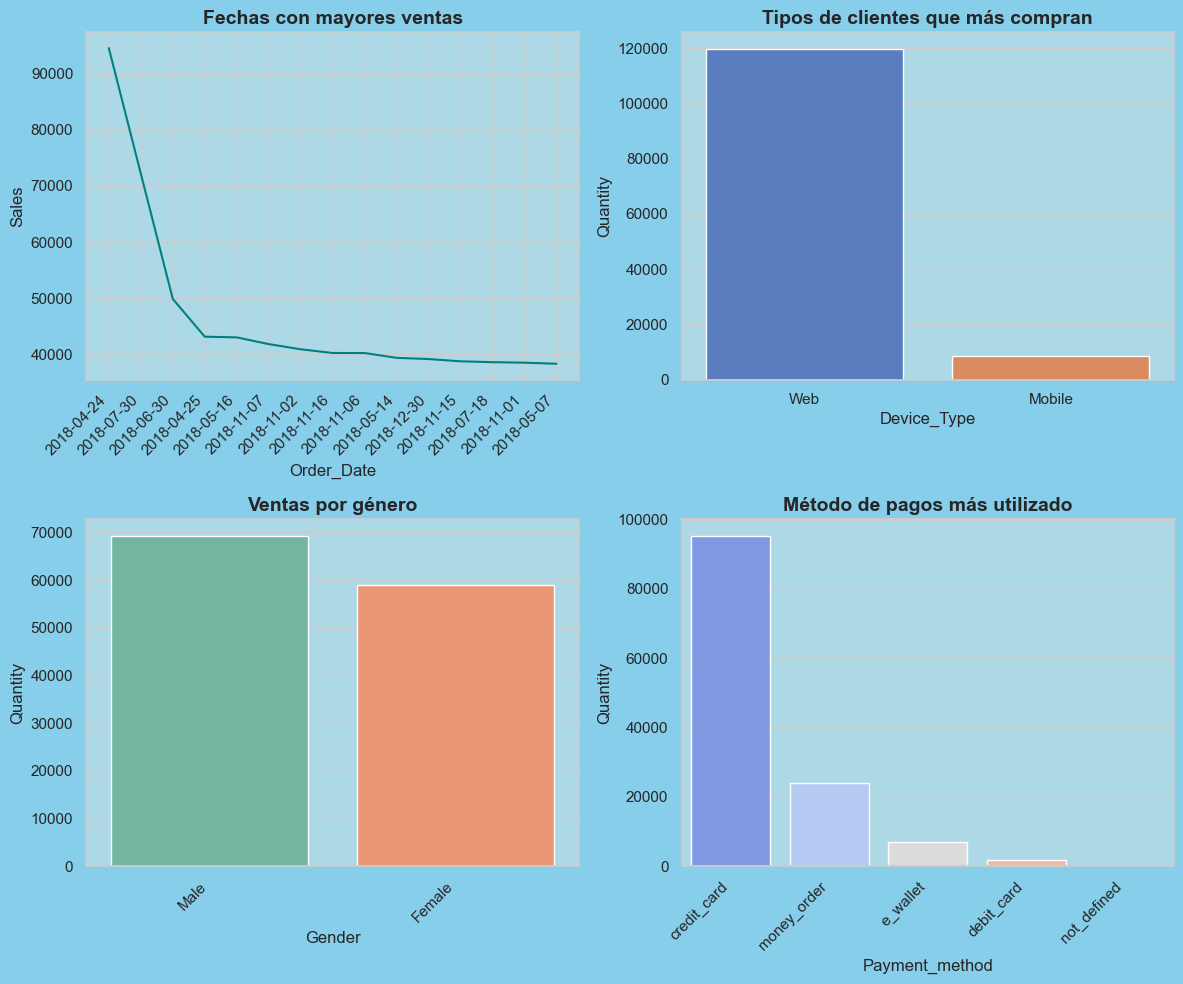

In [84]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")  # Puedes cambiarlo a 'darkgrid', 'ticks', etc.

# Crear las subgráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor='skyblue')

# Gráfico de línea
sns.lineplot(data=fecha, x="Order_Date", y="Sales", ax=axes[0, 0], markers="o", color="teal")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")
axes[0, 0].set_title("Fechas con mayores ventas", fontsize=14, fontweight='bold')
axes[0, 0].set_facecolor('lightblue')

# Gráfico de barras - Ventas por género
sns.barplot(data=genero, x="Gender", y="Quantity", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")
axes[1, 0].set_title("Ventas por género", fontsize=14, fontweight='bold')
axes[1, 0].set_facecolor('lightblue')

# Gráfico de barras - Método de pagos más utilizado
sns.barplot(data=pago, x="Payment_method", y="Quantity", ax=axes[1, 1], palette="coolwarm")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right")
axes[1, 1].set_title("Método de pagos más utilizado", fontsize=14, fontweight='bold')
axes[1, 1].set_facecolor('lightblue')

# Gráfico de barras - Tipos de clientes que más compran
sns.barplot(data=dispositivos, x="Device_Type", y="Quantity", ax=axes[0, 1], palette="muted")
axes[0, 1].set_title("Tipos de clientes que más compran", fontsize=14, fontweight='bold')
axes[0, 1].set_facecolor('lightblue')

# Mejorar espaciado entre subgráficas
plt.tight_layout()

plt.savefig('grafico_ventas2.pdf', format='pdf')
# Mostrar gráfico
plt.show()
